In [33]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
#from scipy.ndimage import gaussian_filter1d
import sys
import matplotlib.animation as animation

In [34]:
date = '20211202'
dataNo = 1
scanNo = 1

In [35]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [36]:
param = 'A0144: LS final amplitude 1'
scan_param = scan_data[param]

In [37]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

In [38]:
sample1 = -8 
sample2 = 2
sample3 = 8
unit = '[V]'

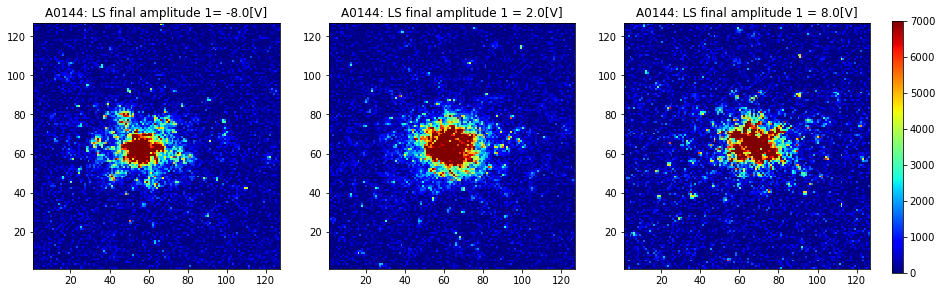

In [61]:

share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_ave = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave


img_trans_sample1 = []
img_trans_sample2 = []
img_trans_sample3 = []
for N in range(len(trans_files)):
    if scan_param[N] == sample1:
        img_trans_sample1 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample2:
        img_trans_sample2 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample3:
        img_trans_sample3 += [np.array(Image.open(trans_files[N]))]
img_trans_sample1 = np.average(img_trans_sample1,axis=0) -img_flat_ave
img_trans_sample2 = np.average(img_trans_sample2,axis=0) -img_flat_ave
img_trans_sample3 = np.average(img_trans_sample3,axis=0) -img_flat_ave

fig =plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(1,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=0, vmax=7000, shading='auto',cmap="jet")
ax1.set_aspect('equal')
ax1.set_xlim(1,127)
ax1.set_ylim(1,127)
ax1.set_title(param+"= %.01f"%(sample1)+unit)

ax2 = fig.add_subplot(1,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=0, vmax=7000, shading='auto',cmap="jet")
ax2.set_aspect('equal')
ax2.set_xlim(1,127)
ax2.set_ylim(1,127)
ax2.set_title(param+" = %.01f"%(sample2)+unit)

ax3 = fig.add_subplot(1,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=0, vmax=7000, shading='auto',cmap="jet")
ax3.set_aspect('equal')
ax3.set_xlim(1,127)
ax3.set_ylim(1,127)
ax3.set_title(param+" = %.01f"%(sample3)+unit)
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(mappable,cax=cbar_ax)
plt.show()

In [62]:
CoMx_list=[]
CoMy_list=[]
for N in range(len(trans_files)):
    CoMy = []
    CoMx = []
    nx=np.sum(img_trans_list[N], axis=0)/np.sum(img_trans_list[N])
    ny=np.sum(img_trans_list[N], axis=1)/np.sum(img_trans_list[N])
    for i in range(len(nx)):
        CoMx += [i*nx[i]]
    for i in range(len(ny)):
        CoMy += [i*ny[i]]
    CoMx_list.append(np.sum(CoMx))
    CoMy_list.append(np.sum(CoMy))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


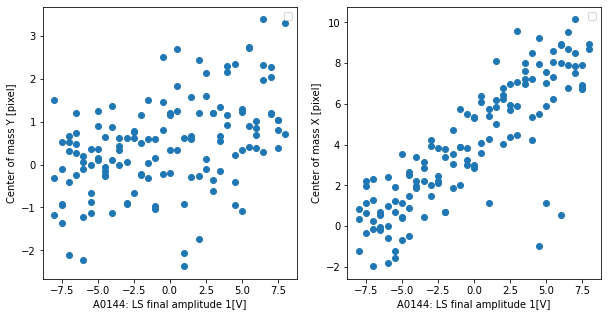

In [64]:
y_init = []
x_init = []
for N in range(len(trans_files)):
    if scan_param[N] == -8:
        y_init.append(CoMy_list[N])
        x_init.append(CoMx_list[N])
y_init = np.mean(y_init)
x_init = np.mean(x_init)

fig =plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(scan_param,CoMy_list-y_init)
ax1.set_xlabel(param + "[V]")
ax1.set_ylabel("Center of mass Y [pixel]")
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(scan_param,CoMx_list-x_init)
ax2.set_xlabel(param + "[V]")
ax2.set_ylabel("Center of mass X [pixel]")
ax2.legend()